# Importing Libiraries

In [75]:
import numpy as np  # for math operations
import pandas as pd # for reading dataset
import matplotlib.pyplot as plt    #Library for graph
import seaborn as sns     #Library for graph
from sklearn.model_selection import train_test_split #to split data into train and test
from sklearn.preprocessing import StandardScaler # to scale the data (between 0 and 1)
from sklearn.tree import DecisionTreeClassifier  # to use decision tree
from sklearn.metrics import accuracy_score     # to get accuracy score
from sklearn import metrics

# Loading data

In [3]:
path =  r'C:\Users\usama\Desktop\card_transdata.csv'

data= pd.read_csv(path)

# Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [5]:
print("Dimensions are : ", data.shape) #to print data dimensions

Dimensions are :  (1000000, 8)


In [6]:
data.head().style.background_gradient(cmap='BuPu') # printing the first 5 rows

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [7]:
data.describe().T.style.set_properties(**{'background-color': 'black', 'color': 'lawngreen', 'border-color': 'Black'}) #describing data

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.000000,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723670
distance_from_last_transaction,1000000.000000,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104560
ratio_to_median_purchase_price,1000000.000000,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.000000,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.000000,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.000000,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.000000,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.000000,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
fraud = data[data['fraud'].isin([1])]     #Getting all one's togther
not_fraud = data[data['fraud'].isin([0])]    #Getting all zero's togther
print('Fraud data are : ')
print(fraud)
print('............................................................................................................................................................................................................................')
print('Not fraud data are: ')
print(not_fraud)

Fraud data are : 
        distance_from_home  distance_from_last_transaction  \
13                2.131956                       56.372401   
24                3.803057                       67.241081   
29               15.694986                      175.989182   
35               26.711462                        1.552008   
36               10.664474                        1.565769   
...                    ...                             ...   
999908           45.296658                        0.882736   
999916          167.139756                        0.282253   
999919          124.640118                        0.004416   
999939           51.412900                        3.429330   
999949           15.724799                        1.875906   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
13                            6.358667                1          0   
24                            1.872950                1          0   
29                         

Getting fraud status

In [9]:
Yes_fraud = data[data['fraud'].isin([1])]   
No_fraud = data[data['fraud'].isin([0])]
t = len(Yes_fraud)
print('No. of frauds is : ' ,t)
f =len(No_fraud)
print('No. of no frauds is :  ',f )

No. of frauds is :  87403
No. of no frauds is :   912597


# Cleaning Data

In [10]:
data.isnull().sum().head(10) #checking that no nulls

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
d_rows =   data[data.duplicated()]
print("Number of duplicated rows is:  ",d_rows.shape[0]) # check that no duplicates

Number of duplicated rows is:   0


# Scaling data

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [36]:
X[0]

array([ 0.47788202, -0.18284892,  0.04349141,  0.36658372,  1.36157608,
       -0.33445812, -1.36442519])

# Splitting data

In [37]:
print(data.columns)

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


In [38]:
x = data.iloc[     :       ,          : -1]    # features
y = data.iloc[     :       ,            -1]    #target

# now x = features &     y = target

In [39]:
x.head().style.background_gradient(cmap = "RdPu")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1000,shuffle = True ) 
print('X_train is : ',X_train.shape)
print('X_test is : ',X_test.shape)
print('Y_train is : ',y_train.shape)
print('Y_test is : ',y_test.shape)

X_train is :  (750000, 7)
X_test is :  (250000, 7)
Y_train is :  (750000,)
Y_test is :  (250000,)


# Data Analytics and Graphs

In [43]:
Fraud_Data = data["fraud"].value_counts()
Fraud_Data

0    912597
1     87403
Name: fraud, dtype: int64

1) Bar Plot

Text(0.5, 1.0, 'Fraud vs Not_Fraud')

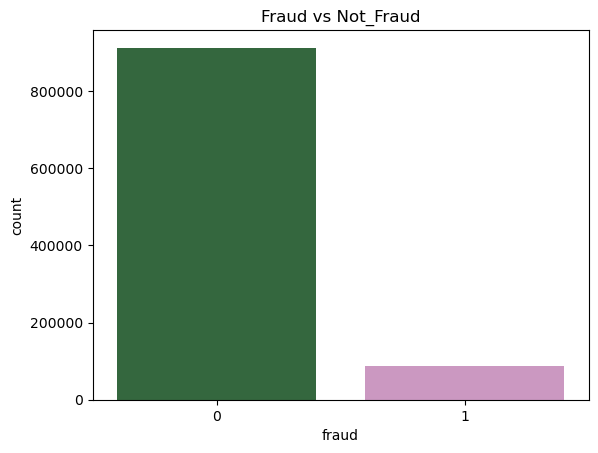

In [44]:
sns.countplot(x= data["fraud"], palette = 'cubehelix')
plt.title('Fraud vs Not_Fraud')

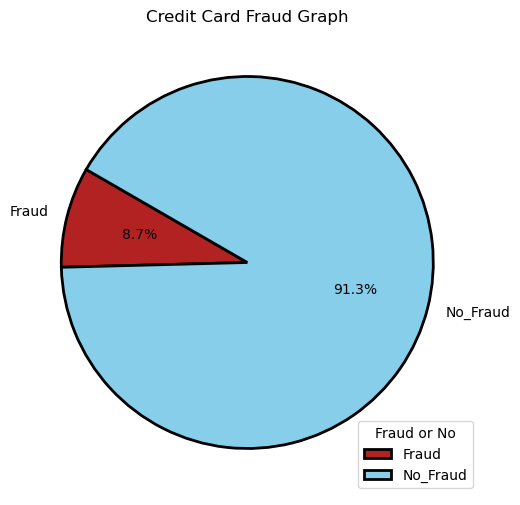

In [45]:
plt.figure(figsize=(6,10))
y = np.array([t,f])
labels = ["Fraud","No_Fraud"]
colors = ["firebrick", "skyblue"]
plt.pie(y,labels = labels,colors=colors,autopct='%1.1f%%',startangle = 150,wedgeprops = {"edgecolor" : "black", 'linewidth': 2,
'antialiased': True})
plt.legend(title="Fraud or No",fontsize="10", loc="lower right")
plt.title("Credit Card Fraud Graph")
plt.show() 

In [46]:
R_Data = data["repeat_retailer"].value_counts()
R_Data

1    881536
0    118464
Name: repeat_retailer, dtype: int64

In [47]:
C_Data = data["used_chip"].value_counts()
C_Data


0    649601
1    350399
Name: used_chip, dtype: int64

In [48]:
P_Data = data["used_pin_number"].value_counts()
P_Data

0    899392
1    100608
Name: used_pin_number, dtype: int64

In [49]:
O_Data = data["online_order"].value_counts()
O_Data

1    650552
0    349448
Name: online_order, dtype: int64

1) Bar Plot

<Axes: xlabel='online_order', ylabel='count'>

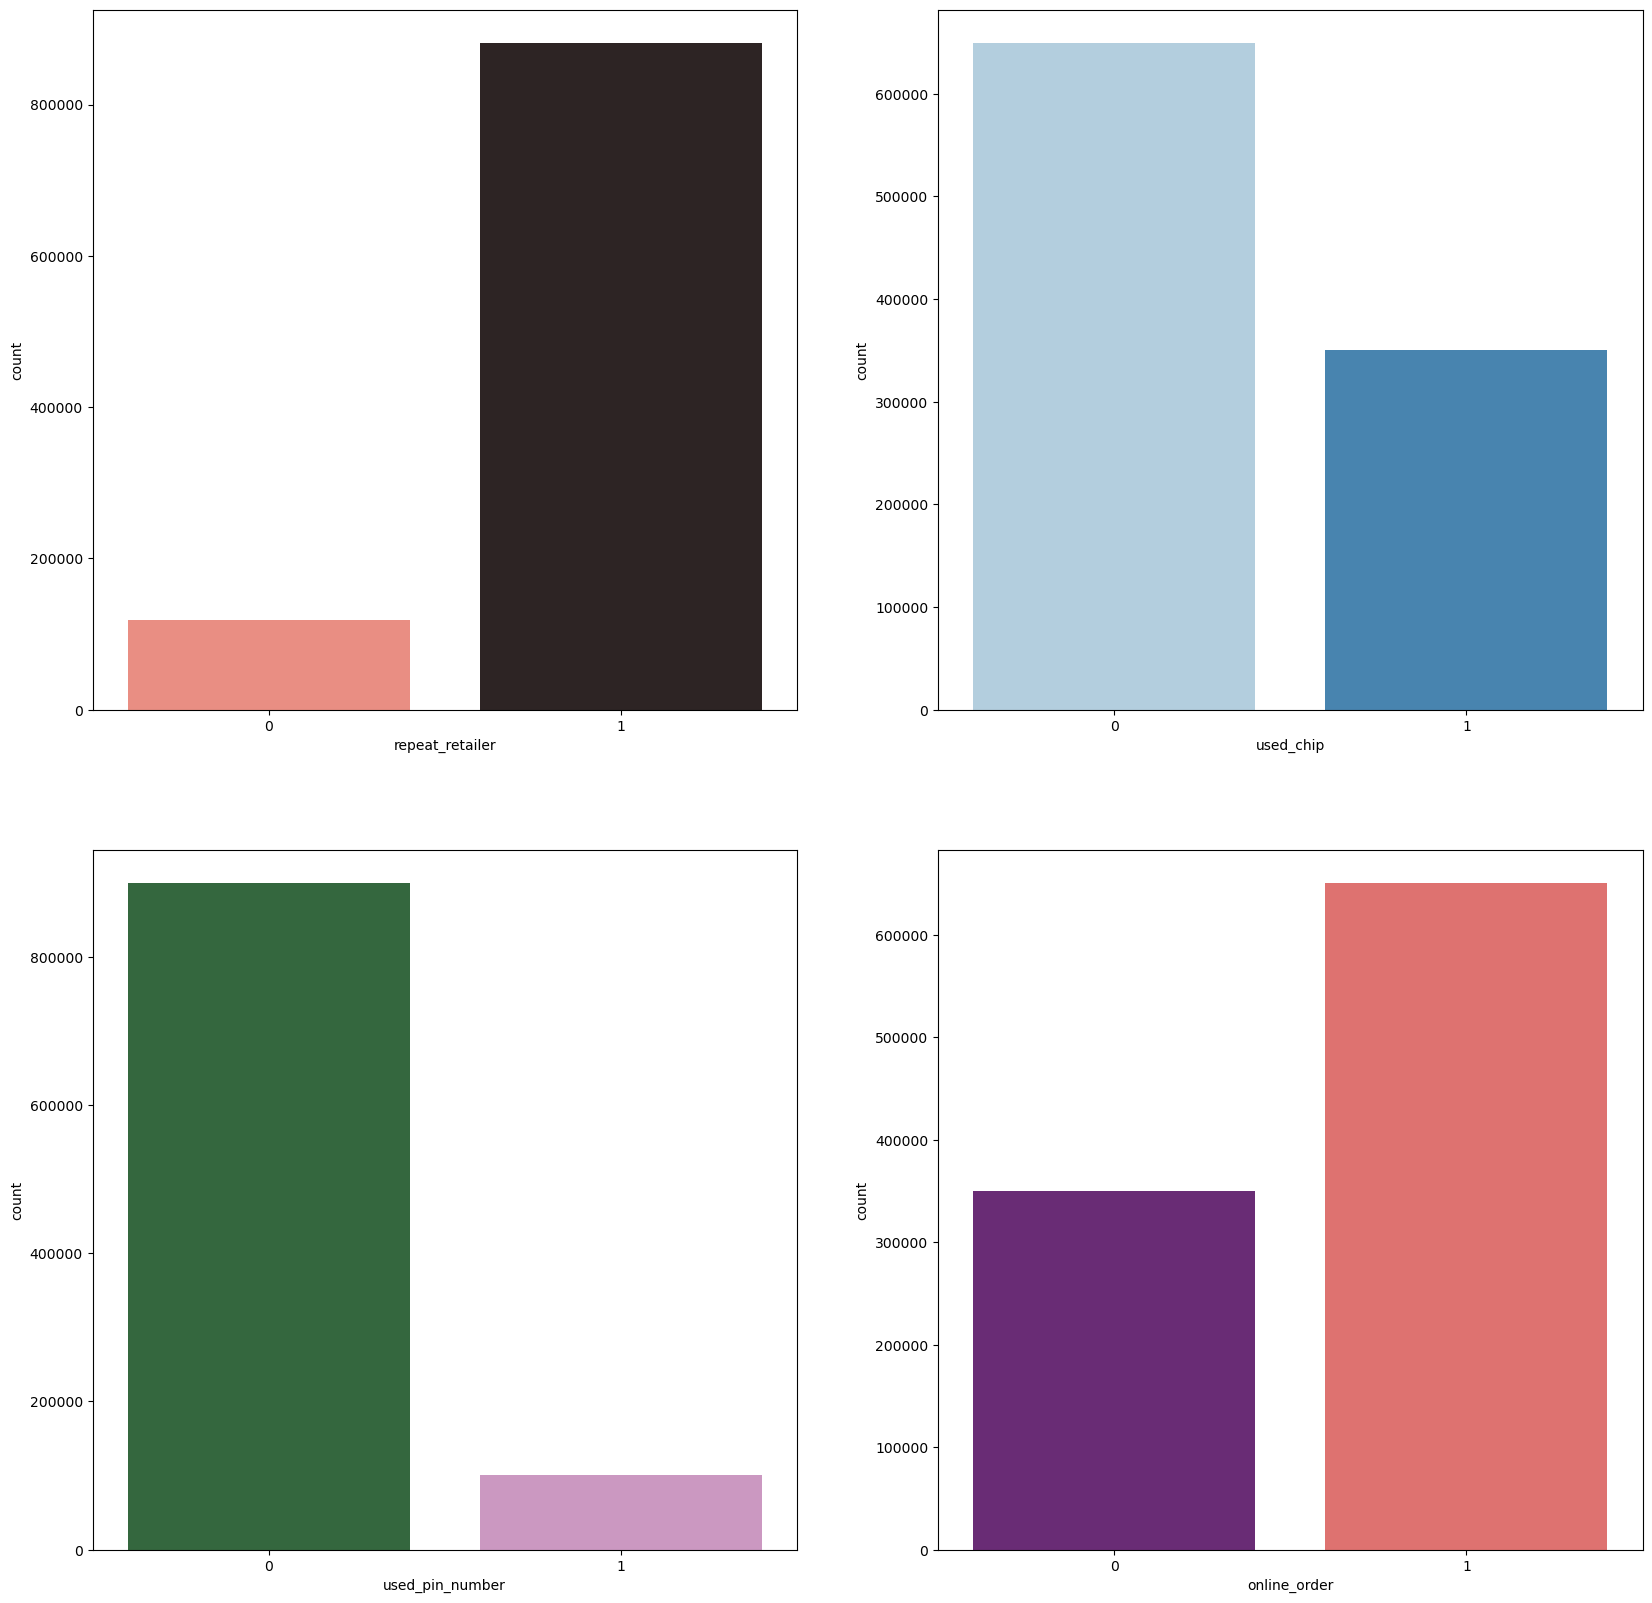

In [50]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "dark:salmon_r", data = data)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Blues", data = data)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "cubehelix", data = data)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "magma", data  = data)

2) Pie Plot

Text(0.5, 1.0, 'Was the transaction online?')

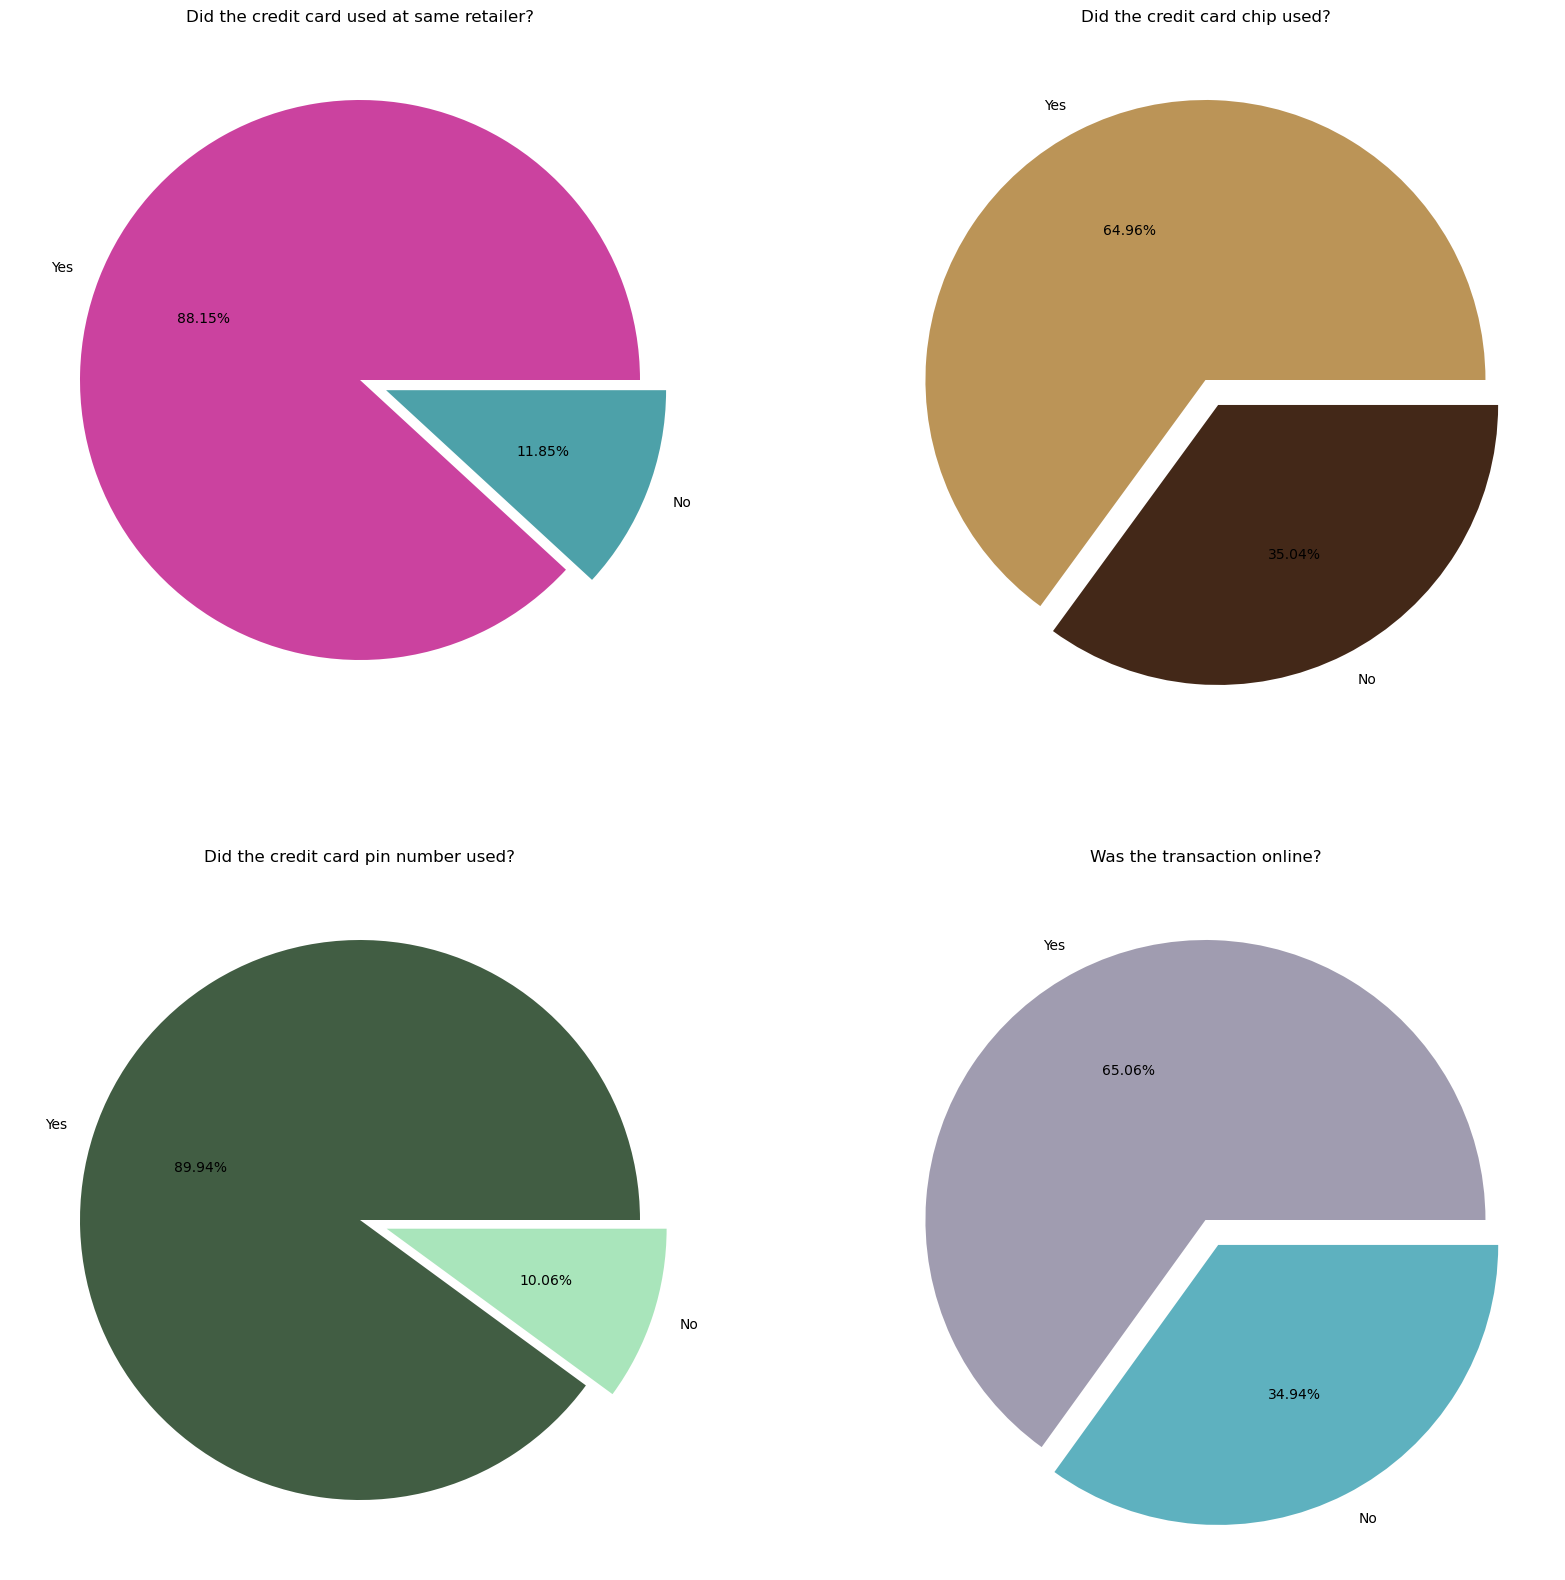

In [51]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(data["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1),colors = ["#CB429F", "#4DA1A9"],) 
plt.title("Did the credit card used at same retailer?")

plt.subplot(2,2,2)
plt.pie(data["used_chip"].value_counts(), labels = ("Yes", "No") , autopct = "%.2f%%", explode = (0, 0.1),colors = ["#BB9457", "#432818"])
plt.title("Did the credit card chip used?")

plt.subplot(2,2,3)
plt.pie(data["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1),colors = ["#415D43", "#A9E5BB"])
plt.title("Did the credit card pin number used?")

plt.subplot(2,2,4)
plt.pie(data["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1),colors = ["#A09CB0", "#5EB1BF"])
plt.title("Was the transaction online?")

# Models

Decision Tree

In [52]:
treemodel = DecisionTreeClassifier()
parameter= { 'criterion' :['gini','entropy', 'log_loss'] , 'max_depth' :[1,2,3,4,5] } #calculation Method

In [55]:
from sklearn.model_selection import GridSearchCV # test every calculation method
cv = GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)

In [64]:
cv.fit(X_train,y_train)
cv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [65]:
y_predtree=cv.predict(X_test)

In [66]:
print("Accuracy is ",(accuracy_score(y_test,y_predtree)))

Accuracy is  0.999004


 Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression

In [72]:
LR = LogisticRegression(max_iter = 200)
LR.fit(X_train, y_train)
y_predLR = LR.predict(X_test)
print("Accuracy is ",(accuracy_score(y_test,y_predLR)))

Accuracy is  0.959164


In [73]:
models = ["Logistic Regression", "Decision Tree"] # array carries models name

In [76]:
accuracy = [LR.score(X_test, y_test), metrics.accuracy_score(y_test, y_predtree)] # array carries accuracy scores

In [78]:
Table_of_Models = []
Table_of_Models = pd.DataFrame(models, columns=["    Model   Name     "])
Table_of_Models["Accuracy"] = accuracy
Table_of_Models.style.set_properties(**{'background-color': 'white', 'color': 'blue', 'border-color': 'black'})

,Model Name,Accuracy
0,Logistic Regression,0.959164
1,Decision Tree,0.999004


According to the table of models we see that Decision Tree accuracy is better than logistic regression.